In [1]:
import pandas as pd

df = pd.read_csv('data/preprocessed_data.csv')

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
Y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_features="sqrt", max_depth=None, random_state=None):

        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def _get_max_features(self, n_features):
        if isinstance(self.max_features, int):
            return self.max_features
        elif self.max_features == "sqrt":
            return int(np.sqrt(n_features))
        elif self.max_features == "log2":
            return int(np.log2(n_features))
        else:
            return n_features

    def fit(self, x, y):
        np.random.seed(self.random_state)
        x, y = np.array(x), np.array(y)
        n_samples, n_features = x.shape

        for _ in range(self.n_estimators):

            X_sample, y_sample = resample(x, y, random_state=self.random_state)

            max_features = self._get_max_features(n_features)
            feature_idx = np.random.choice(n_features, max_features, replace=False)
            self.feature_indices.append(feature_idx)

            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_sample[:, feature_idx], y_sample)
            self.trees.append(tree)

    def predict(self, x):

        x = np.array(x)
        predictions = np.array([
            tree.predict(x[:, feature_idx]) for tree, feature_idx in zip(self.trees, self.feature_indices)
        ])
        return np.mean(predictions, axis=0)


In [6]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

In [7]:
y_pred = model.predict(X_test)

In [8]:
from model_analysis import *

evaluation_metrics(y_test, y_pred)

Ortalama Mutlak Hata 0.3251773265110838
Ortalama Karesel Hata: 0.21188839096229495
Kök Ortalama Karesel Hata: 0.46031336170297615
R² Skor: 0.6907227284969237


In [9]:
pd.DataFrame(np.exp(y_pred), np.exp(y_test))

,0
price,
540001.0,508370.741480
160001.0,252613.352343
334001.0,330632.150248
399001.0,426688.076610
284901.0,305993.689835
...,...
154901.0,173425.630732
23001.0,148828.906109
359901.0,381825.713294


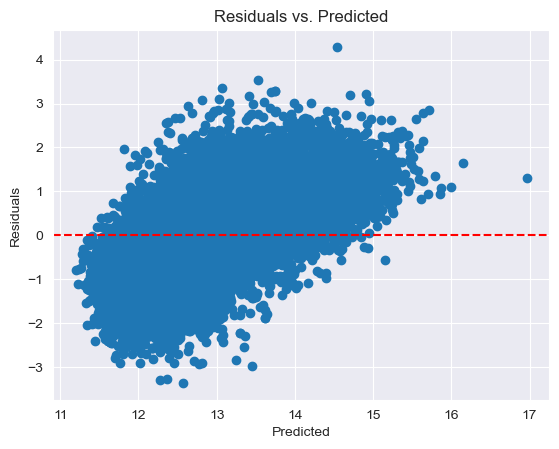

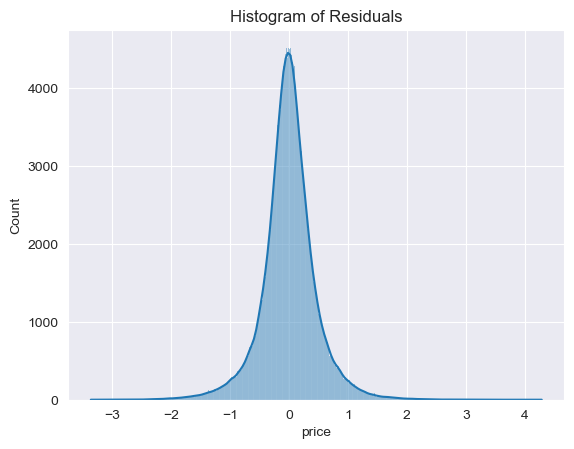

In [10]:
residual_analysis(y_test, y_pred)